### Importing needed functions and libraries

In [1]:
from main.training_functions import *

### Loading training class-balanced datasets and labels

In [57]:
with h5py.File('./data/training_amplitude_maps.hdf5', 'r') as f:
    fm_amp = f['data'][:]
    
with h5py.File('./data/training_frequency_maps.hdf5', 'r') as f:
    fm_fft = f['data'][:]
    
labels = np.genfromtxt('./data/training_labels.csv',delimiter=',')
labels = to_categorical(labels)

### Visualization of amplitude and frequency feature maps used for training<p>
Abbrevations:
1. AFFT_10_20Hz - sum of amplitude spectrum in the frequency range from 10 to 20 Hz (1 cell is an equivalent of 1 trace)
2. AFFT_20_30Hz - same as above
3. AFFT_30_40Hz - same as above
4. AMP_MAX - maximum amplitude of a scaled trace
5. ENV_0_33 - histogram of envelope samples in percentile range from 0 to 33
6. ENV_33_66 - histogram of envelope samples in percentile range from 33 to 66

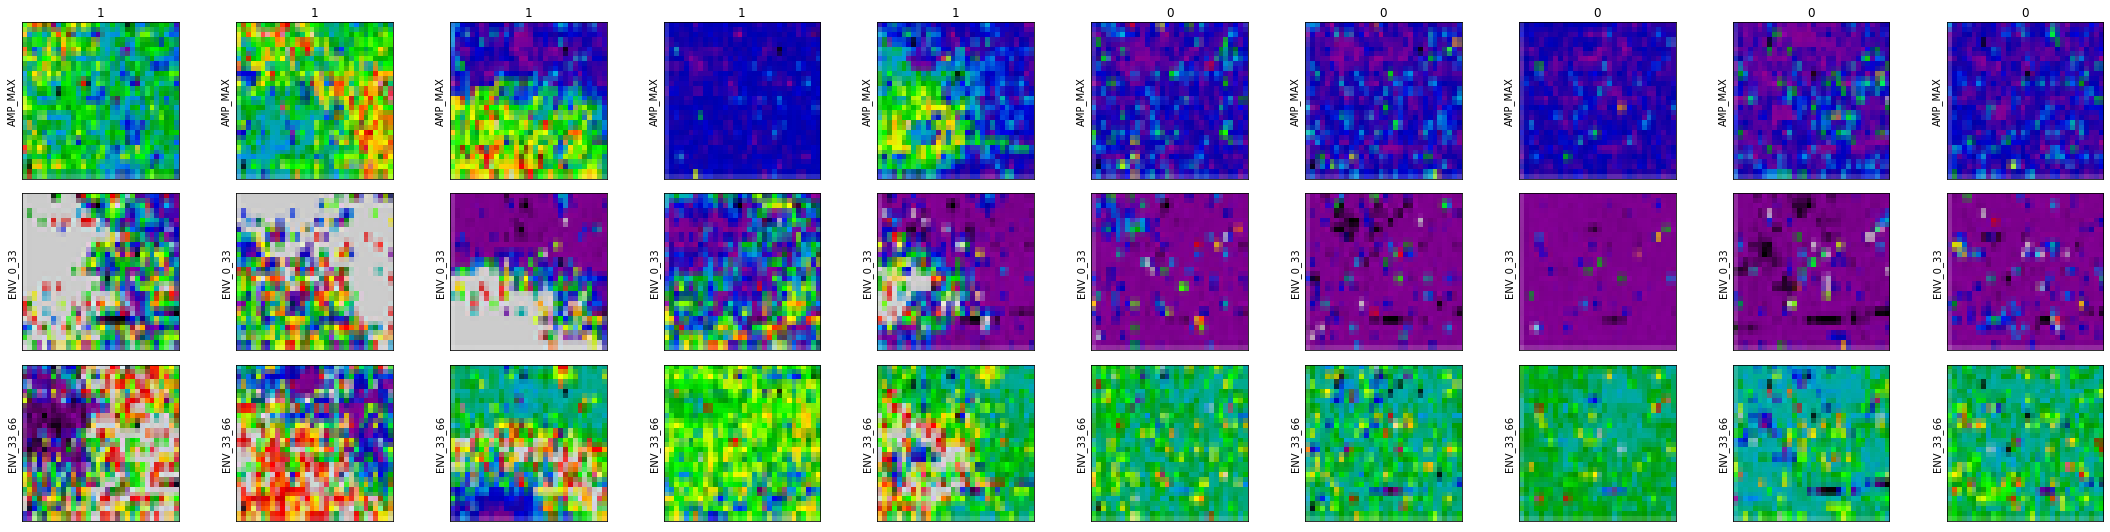

In [64]:
plot_precomputed_fm([50,250,500,750,1000,2000,2250,2500,2750,3000],fm_amp,[1,1,1,1,1,0,0,0,0,0],['AMP_MAX','ENV_0_33','ENV_33_66'])

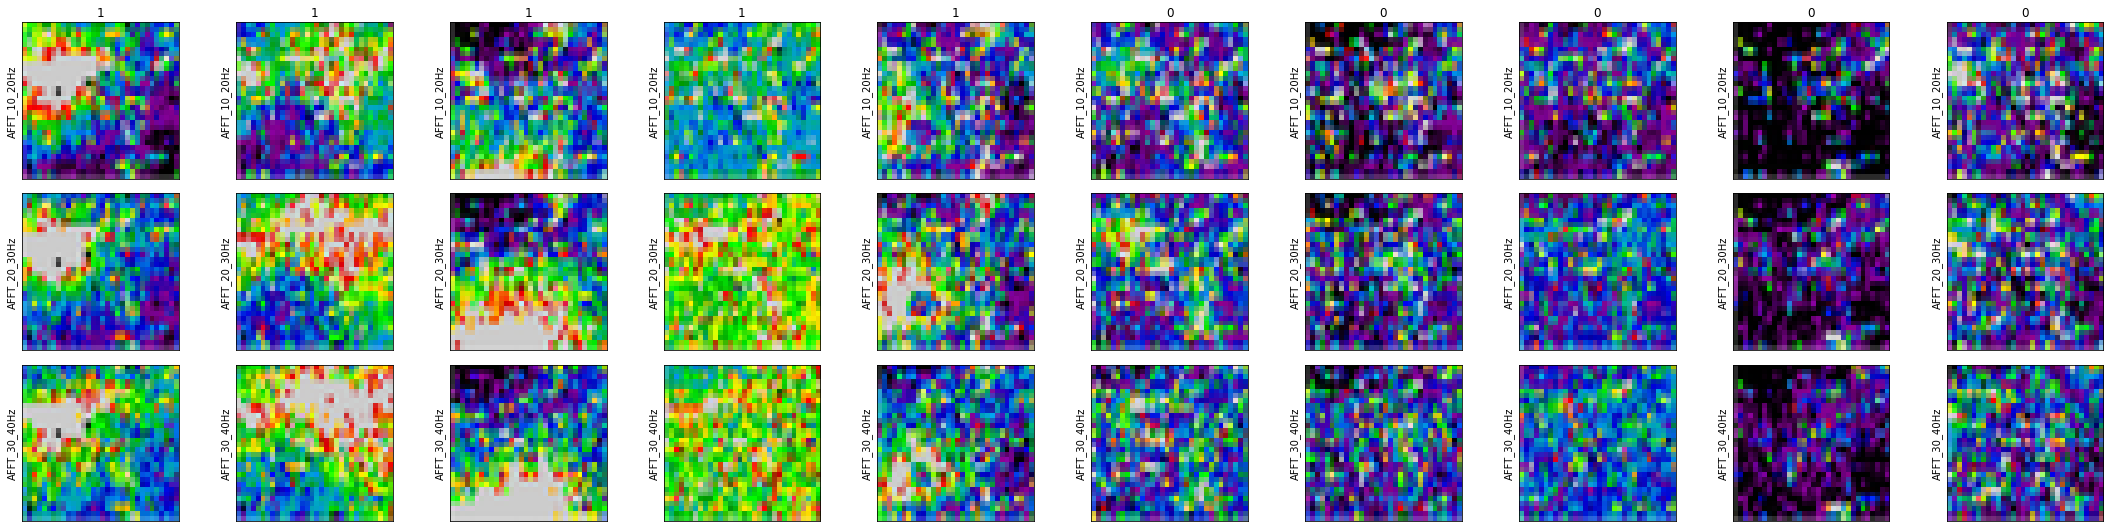

In [65]:
plot_precomputed_fm([50,250,500,750,1000,2000,2250,2500,2750,3000],fm_fft[0:3],[1,1,1,1,1,0,0,0,0,0],['AFFT_10_20Hz','AFFT_20_30Hz','AFFT_30_40Hz'])

### Training of the amplitude- and frequency-based CNN models:

In [66]:
model_amp,model_fft,model_amp_history,model_fft_history,y_test,y_predicted=train_model(fm_amp,fm_fft,labels)

Training of model_amp started.
Training of model_fft started.
Running prediction on test set.


### Three-headed CNN architecture for both of models based on amplitude and frequency features:

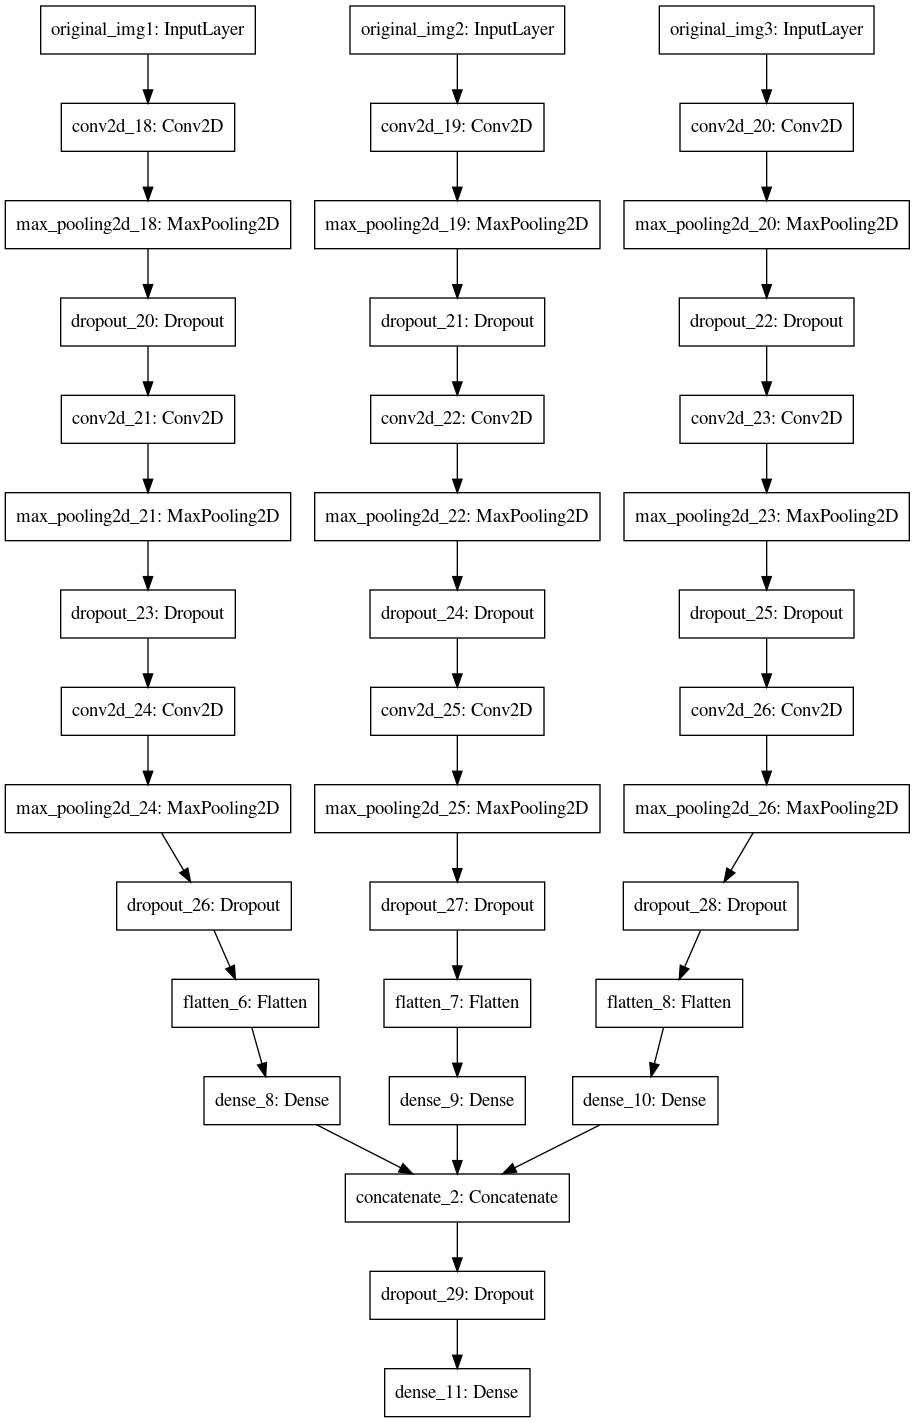

In [67]:
tf.keras.utils.plot_model(model_amp)

### Mean squared error loss (black) and accuracy (red) over the training epochs for the training set

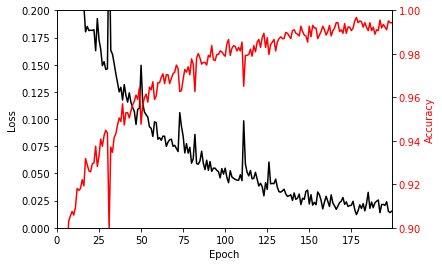

In [68]:
fig, ax1 = plt.subplots()
ax1.plot(model_amp_history.history['loss'],c='black')
ax1.set_ylim(0,0.2)
ax1.set_xlim(0,199)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()
ax2.plot(model_amp_history.history['accuracy'],c='red')
ax2.set_ylim(0.9,1)
ax2.set_xlim(0,199)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy', color='red')
ax2.tick_params(axis='y', labelcolor='red')

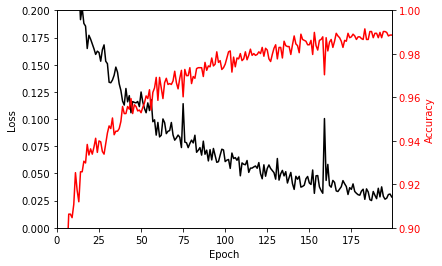

In [69]:
fig, ax1 = plt.subplots()
ax1.plot(model_fft_history.history['loss'],c='black')
ax1.set_ylim(0,0.2)
ax1.set_xlim(0,199)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.tick_params(axis='y', labelcolor='black')
ax2 = ax1.twinx()
ax2.plot(model_fft_history.history['accuracy'],c='red')
ax2.set_ylim(0.9,1)
ax2.set_xlim(0,199)
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy', color='red')
ax2.tick_params(axis='y', labelcolor='red')

### Model performance measures calculated on the test set:

In [70]:
y_predicted_boundary=y_predicted.copy()
y_predicted_boundary[y_predicted_boundary>0.5]=1
y_predicted_boundary[y_predicted_boundary<=0.5]=0
precision, recall, _ = precision_recall_curve(y_test,y_predicted)
print('PR-AUC score:' ,np.round(auc(recall,precision),3))
print('F1 score:' ,np.round(f1_score(y_test,y_predicted_boundary),3))
print('Accuracy score:' ,np.round(accuracy_score(y_test,y_predicted_boundary),3))

PR-AUC score: 0.997
F1 score: 0.933
Accuracy score: 0.928


### Precision-recall curve plot:

Text(0, 0.5, 'Precision')

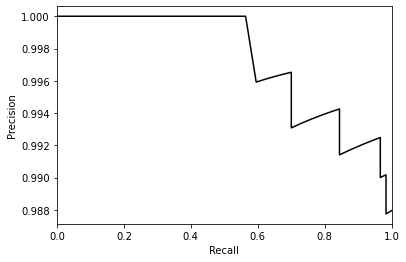

In [71]:
plt.plot(recall,precision,c='black')
plt.xlim(0,1)
plt.xlabel('Recall')
plt.ylabel('Precision')

### Saving the amplitude- and frequency-based CNN models.

In [51]:
model_amp.save('./models/model_amp.h5')
model_fft.save('./models/model_fft.h5')